## Importing Libraries

In [118]:
import pandas as pd # for handling dataset
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [10]:
# reading data
df1=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\Third\bigdatamart_Train.csv') 
df2=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\Third\bigdatamart_Test.csv') 

In [4]:
df1.head() # to display data from top 5 only 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
df2.head() # to display data from top 5 only 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Dataset Description

Item_Identifier --- product ID

Item_Weight --- Weight of product

Item_Fat_Content --- Checks the Concentration of fat in the product

Item_Visibility --- The % of total display area of all similar products in a store

Item_Type --- Product Category

Item_MRP --- Maximum Retail Price for a Product

Outlet_Identifier --- Store ID

Outlet_Establishment_Year --- The year in which store was established

Outlet_Size --- The size of the store (Area Size Category)

Outlet_Location_Type --- In Terms of city Tiers (Size)

Outlet_Type --- Grocery store or a type of supermarket

Item_Outlet_Sales --- Sales of the product In the Specific outlet

In [5]:
df1.shape # to display total no of rows & columns

(8523, 12)

In [6]:
df1.columns # to display all columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### there are 7 categorical columns and 5 continous data columns

In [8]:
df1.isnull().sum() # Checking null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df2.isnull().sum() # Checking null values

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
# filling the null values for Item Weight
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())
df2['Item_Weight']=df2['Item_Weight'].fillna(df2['Item_Weight'].mean())

In [14]:
sum(df1['Item_Visibility']==0)

526

In [15]:
sum(df2['Item_Visibility']==0)

353

In [16]:
# replacing 0 values with mean of Item Visibility
df1['Item_Visibility']=df1['Item_Visibility'].replace(0,df1['Item_Visibility'].mean())
df2['Item_Visibility']=df2['Item_Visibility'].replace(0,df2['Item_Visibility'].mean())

In [17]:
# for Outlet size, it can be seen that it can be related to Outlet type to fill null values 
mode_of_outlet_size_train =df1.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
mode_of_outlet_size_test =df2.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [18]:
print(mode_of_outlet_size_train)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [19]:
print(mode_of_outlet_size_test)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [20]:
null_values_train=df1['Outlet_Size'].isnull()

In [21]:
null_values_test=df2['Outlet_Size'].isnull()

In [22]:
print(null_values_train)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [23]:
print(null_values_test)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [28]:
df1.loc[null_values_train, 'Outlet_Size']=df1.loc[null_values_train, 'Outlet_Type'].apply(lambda x:mode_of_outlet_size_train[x])
df2.loc[null_values_test, 'Outlet_Size']=df2.loc[null_values_test, 'Outlet_Type'].apply(lambda x:mode_of_outlet_size_test[x])

In [29]:
# dropping Item_Identifier column as its unique product ID not a necessary feature for predicting sales
df1=df1.drop(columns=['Item_Identifier'])
df2=df2.drop(columns=['Item_Identifier'])

In [30]:
df1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
df2.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### no null values in data, we are good to go ahead.

In [32]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [36]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [37]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [38]:
# appending all the like terms into one, Regular=reg , Low Fat=LF=low fat
df1.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
df2.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [39]:
# checking if it has appended into two fat content categories
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [40]:
df2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [41]:
le=LabelEncoder()

In [42]:
# transforming all the categorical featues into numerical values
df1['Item_Fat_Content'] = le.fit_transform(df1['Item_Fat_Content'])

df1['Item_Type'] = le.fit_transform(df1['Item_Type'])

df1['Outlet_Identifier'] = le.fit_transform(df1['Outlet_Identifier'])

df1['Outlet_Size'] = le.fit_transform(df1['Outlet_Size'])

df1['Outlet_Location_Type'] = le.fit_transform(df1['Outlet_Location_Type'])

df1['Outlet_Type'] = le.fit_transform(df1['Outlet_Type'])

In [43]:
df2['Item_Fat_Content'] = le.fit_transform(df2['Item_Fat_Content'])

df2['Item_Type'] = le.fit_transform(df2['Item_Type'])

df2['Outlet_Identifier'] = le.fit_transform(df2['Outlet_Identifier'])

df2['Outlet_Size'] = le.fit_transform(df2['Outlet_Size'])

df2['Outlet_Location_Type'] = le.fit_transform(df2['Outlet_Location_Type'])

df2['Outlet_Type'] = le.fit_transform(df2['Outlet_Type'])

In [44]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.066132,6,182.0950,0,1998,2,2,0,732.3800
4,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052


In [45]:
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


0    5517
1    3006
Name: Item_Fat_Content, dtype: int64


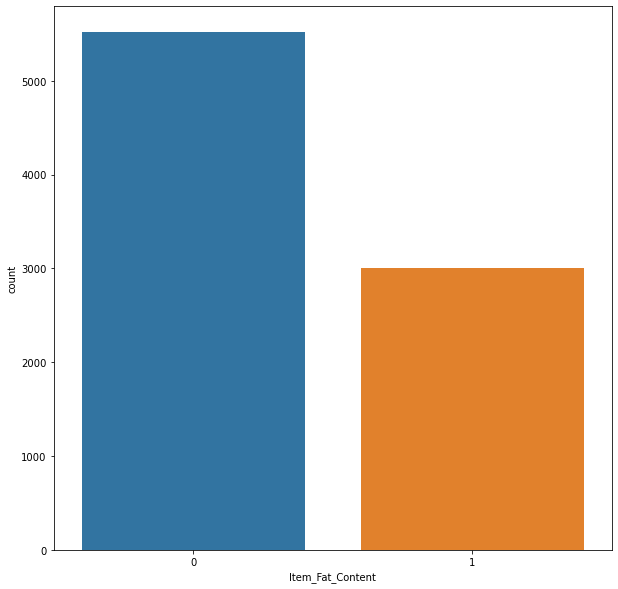

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64


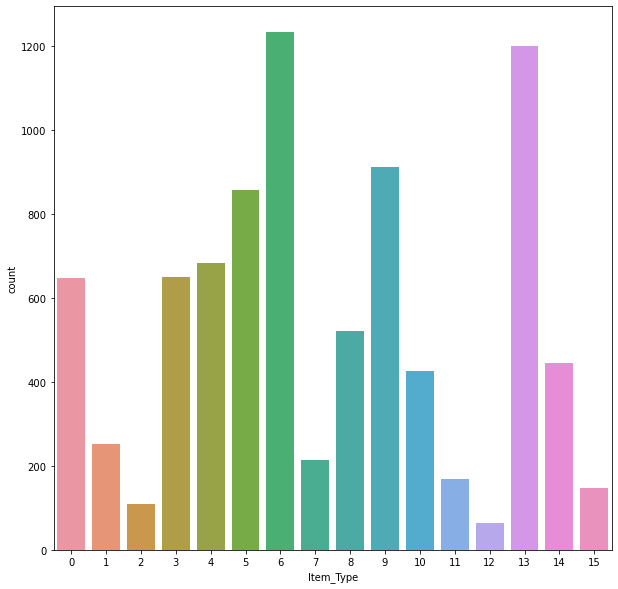

5    935
1    932
6    930
9    930
8    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64


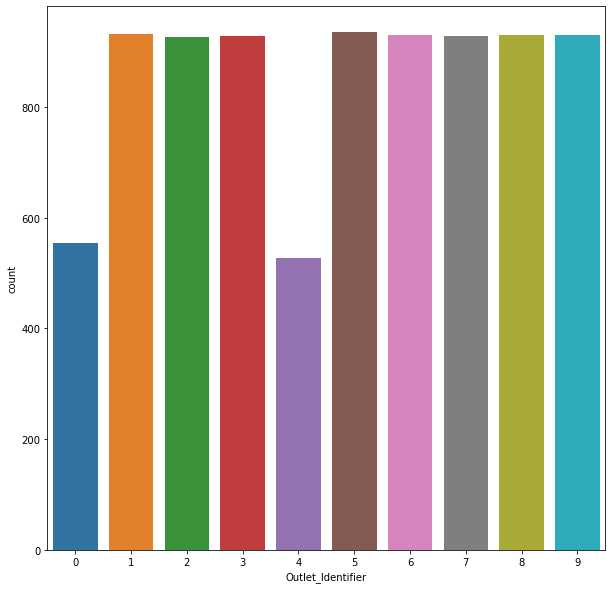

2    4798
1    2793
0     932
Name: Outlet_Size, dtype: int64


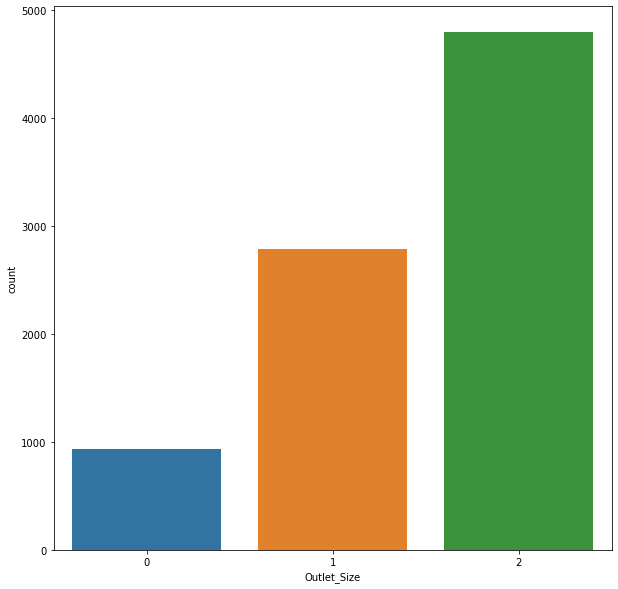

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64


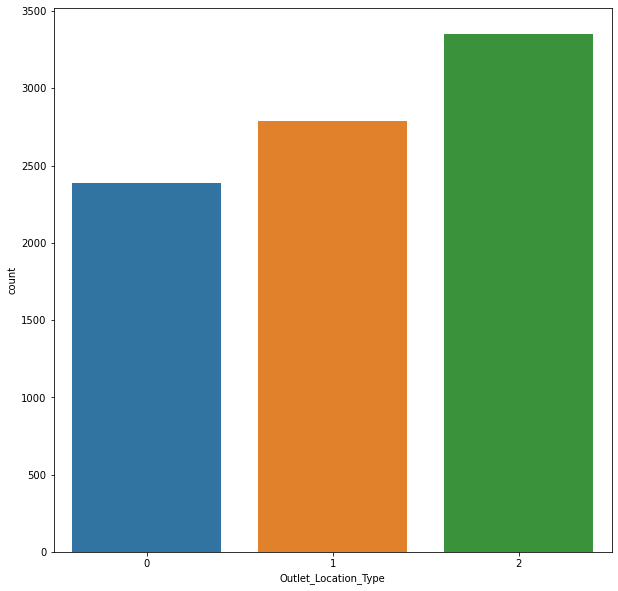

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64


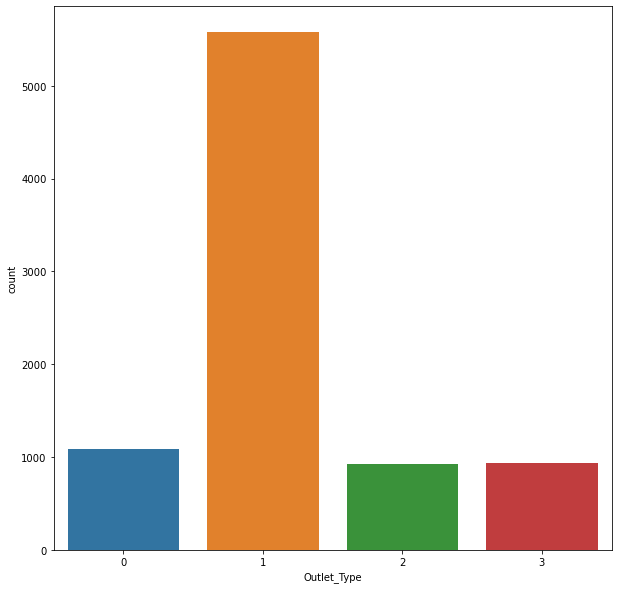

In [46]:
#lets visualize all category columns present in data 
category_columns = df1[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
for col in category_columns:
    print(category_columns[col].value_counts())
    plt.figure(figsize=(10,10))
    sns.countplot(category_columns[col])
    plt.show()

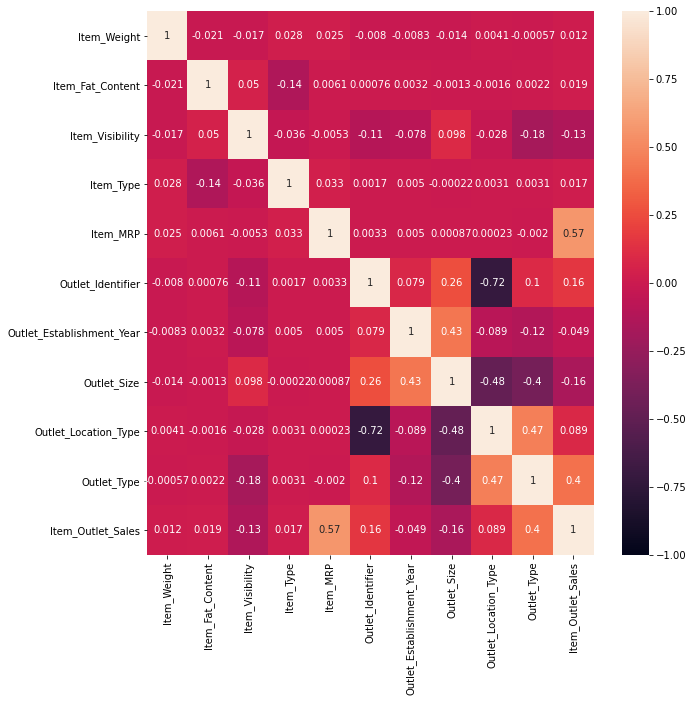

In [47]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

Item_Mrp has better correlation with Item_outlet_sales

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

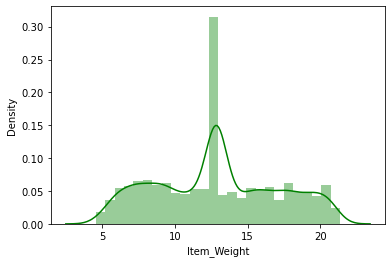

In [48]:
sns.distplot(df1['Item_Weight'] , color = 'green')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

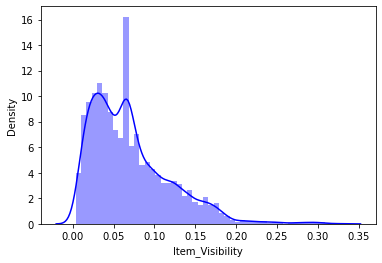

In [49]:
sns.distplot(df1['Item_Visibility'] , color = 'blue')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

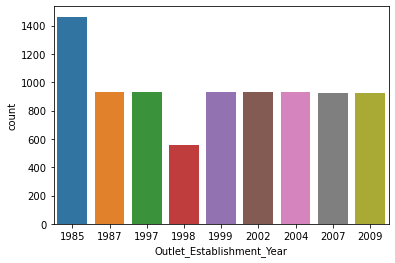

In [50]:
sns.countplot(df1['Outlet_Establishment_Year'])

In [51]:
y = df1['Item_Outlet_Sales']
X = df1.drop('Item_Outlet_Sales', axis = 1)

In [52]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.002242,Item_Weight
1,1.022663,Item_Fat_Content
2,1.068553,Item_Visibility
3,1.022497,Item_Type
4,1.001885,Item_MRP
5,4.148333,Outlet_Identifier
6,1.287465,Outlet_Establishment_Year
7,1.703566,Outlet_Size
8,5.451928,Outlet_Location_Type
9,2.665274,Outlet_Type


### No multicollinearity problem exists

In [54]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 100)

In [55]:
y_train.head()

4122    1549.9824
6590    3691.1952
5460    2996.1000
4541    2105.2596
4186    1619.2256
Name: Item_Outlet_Sales, dtype: float64

In [56]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [57]:
df1.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228


In [58]:
print('The sales prediction is :', regression.predict(scalar.transform([[9.30,0,0.016047,4,249.8092,9,1999,1,0,1]])))

The sales prediction is : [4218.2341364]


In [59]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.5091394768526698

In [60]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.4901900962335033

In [61]:
# To cross verify
y_pred = regression.predict(x_test)

In [62]:
r2_score(y_test,y_pred)

0.4901900962335033

## Using Decision Tree Regressor

In [64]:
# Lets first visualize the tree on the data without doing any pre processing
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
dt_reg.score(x_train,y_train)

1.0

In [66]:
y_pred = dt_reg.predict(x_test)

In [67]:
# Accuracy of our classification tree
dt_reg.score(x_test,y_test)

0.11991915120904728

In [70]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.194503   0.1084796  0.03031418 0.19023902 0.17691611]
0.1400903813578887
0.06305840130766271


### Using GridSearchCV for hyper parameter tuning

In [77]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range (1,20,2),
    'min_samples_split' : range (2,20,2)
}

In [78]:
grid_search = GridSearchCV(estimator=dt_reg,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [79]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

In [80]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 5, 'min_samples_leaf': 19, 'min_samples_split': 8}


In [81]:
dt_reg = DecisionTreeRegressor(max_depth =5, min_samples_leaf=19, min_samples_split=8)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=19, min_samples_split=8)

In [82]:
dt_reg.score(x_test,y_test)

0.5848226702234811

In [83]:
y_pred = dt_reg.predict(x_test)

## Using Random Forest Regressor

In [99]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=51)

In [100]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=51)

In [101]:
rand_reg.score(x_test,y_test)

0.5431731995354679

In [102]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.57047162 0.52577253 0.5176804  0.55835271 0.56846922]
0.5481492956474717
0.022110488841866328


In [106]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,10,3),
    'min_samples_leaf' : range (1,10,2),
    'min_samples_split' : range (2,10,2)
}

In [107]:
grid_search = GridSearchCV(estimator=rand_reg,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [108]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=51), n_jobs=-1,
             param_grid={'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [109]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [110]:
rand_reg = RandomForestRegressor(max_depth =5, min_samples_leaf=9, min_samples_split=2)
rand_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=9)

In [111]:
rand_reg.score(x_test,y_test)

0.5928056332472201

## KNN Regressor

In [129]:
knn=KNeighborsRegressor(n_neighbors=6)

In [130]:
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.5332808284804988

In [148]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.54096087 0.47341875 0.43104425 0.51041859 0.51428187]
0.4940248655942196
0.038139897312638275


In [139]:
# using bagging over our KNN regressor and see if our score improve:
from sklearn.ensemble import BaggingRegressor

In [141]:
bag_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors=6),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True,random_state=3,oob_score=True)

In [142]:
# lets check the out of bag score
bag_knn.oob_score

True

In [143]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.5601392056390924

Great our score significantly improves with use of bagging

## Model Saving

In [144]:
# saving the model to local system
filename = 'BigdataMart_model.pickle'
pickle.dump(rand_reg,open(filename,'wb'))

In [155]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
test_pred=loaded_model.predict(df2)
print(result)

0.5928056332472201


In [158]:
# Saving the prediction file
df2['Item_Outlet_Sales'] = test_pred
df2.to_csv('submit_file.csv',index=False)